In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io
import cv2 as cv

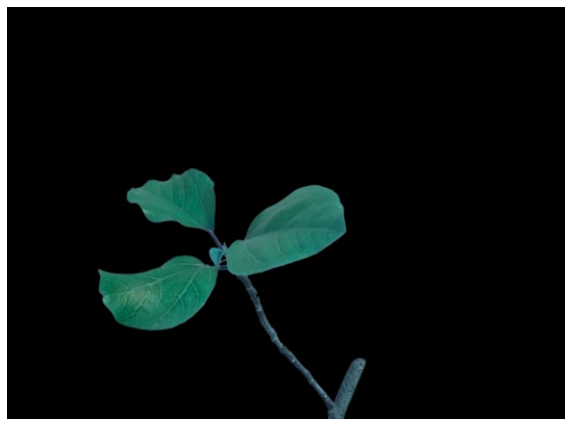

In [50]:
img = cv2.imread("images/test7-removebg-preview.jpg")
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(img)
plt.show()

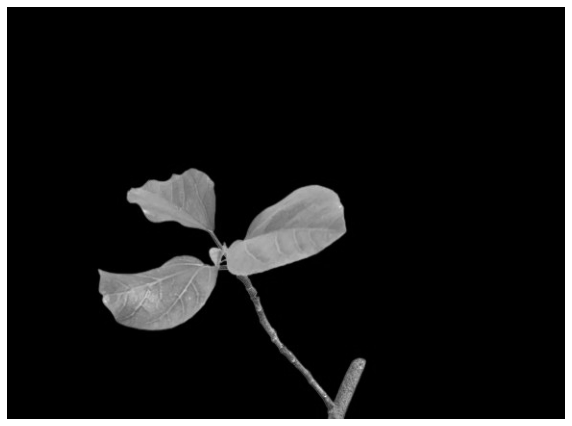

In [51]:
cells = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(cells,cmap="gray")
plt.show()

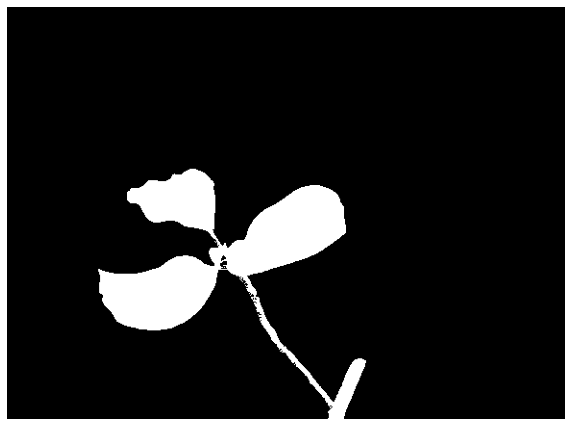

In [31]:
ret1, thresh = cv2.threshold(cells, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(thresh,cmap="gray")
plt.show()

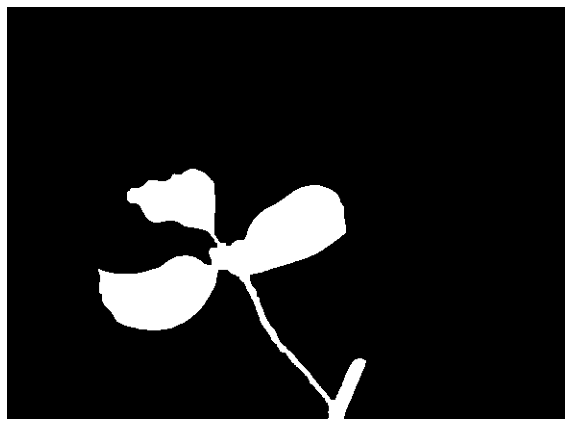

In [32]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(opening,cmap="gray")
plt.show()

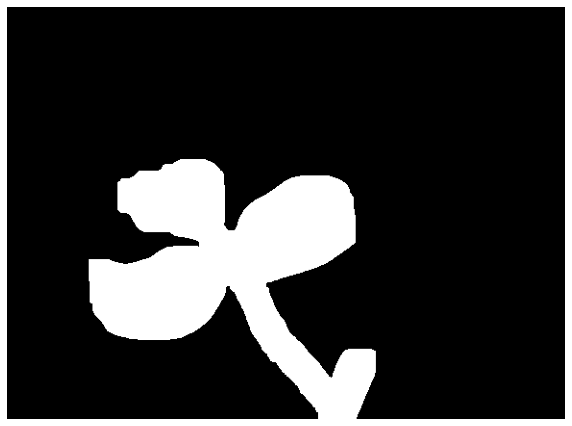

In [33]:
kernel = np.ones((3,3),np.uint8)
sure_bg = cv2.dilate(thresh,kernel,iterations=10)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(sure_bg,cmap="gray")
plt.show()

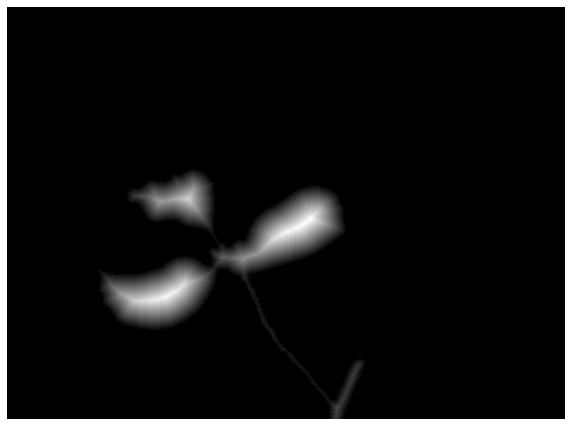

In [34]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(dist_transform,cmap="gray")
plt.show()

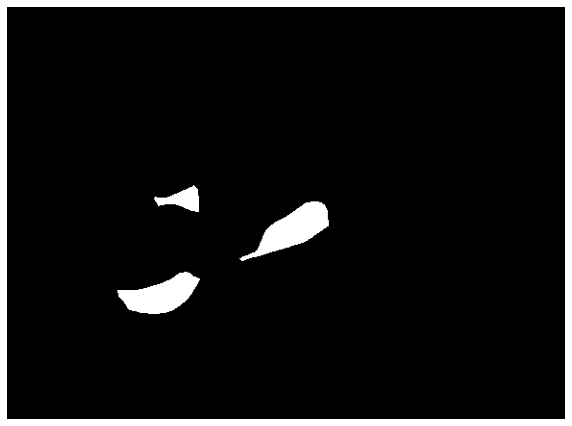

In [35]:
#ret, thresh = cv2.threshold(np.array(image, dtype=np.uint8), 0, 255, 0)
ret2, sure_fg = cv2.threshold(np.array(dist_transform,dtype = np.uint8),0.5*dist_transform.max(),255,0)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(sure_fg,cmap="gray")
plt.show()

In [36]:
contours, _ = cv2.findContours(sure_fg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

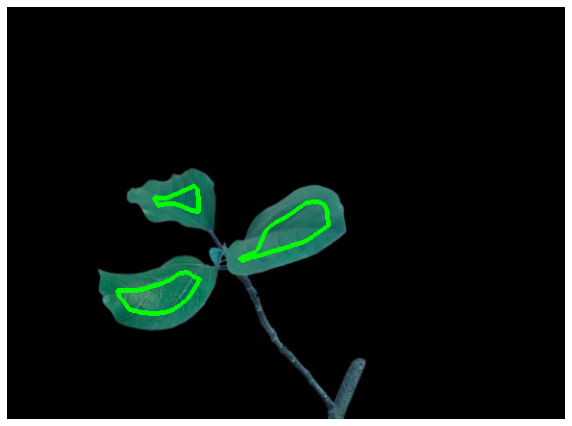

In [37]:
img_cp = img.copy()
cv.drawContours(img_cp, contours, -1, (0,255,0), 3)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(img_cp,cmap="gray")
plt.show()

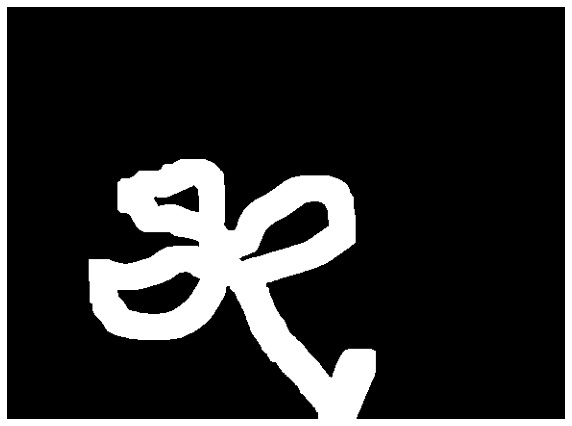

In [38]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(unknown,cmap="gray")
plt.show()

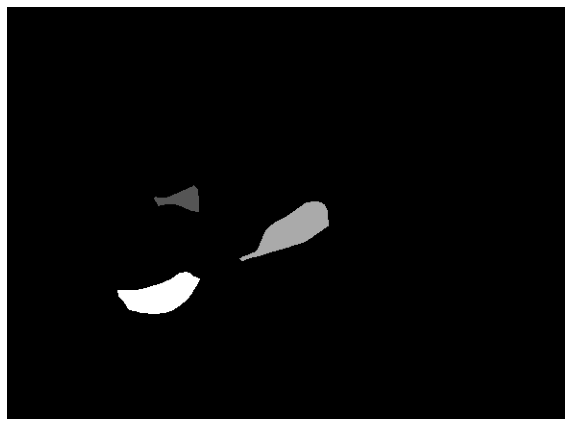

In [39]:
ret3, markers = cv2.connectedComponents(sure_fg)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(markers,cmap="gray")
plt.show()

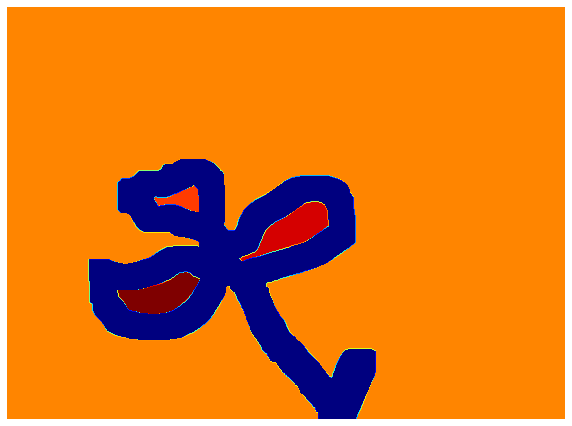

In [40]:
markers = markers+10

markers[unknown==255] = 0
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(markers, cmap='jet')   
plt.show()

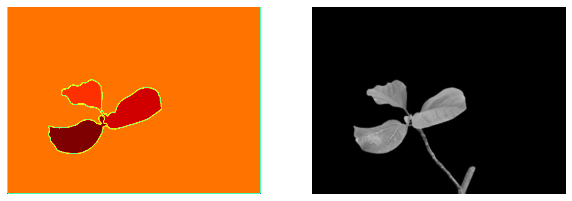

In [43]:
markers2 = cv2.watershed(img,markers)
img[markers == -1] = [0,255,255]  
img2 = color.label2rgb(markers, bg_label=0)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.axis("off")
plt.imshow(markers, cmap='jet')
plt.subplot(122)
plt.axis("off")
plt.imshow(cells, cmap='gray')
plt.show()

In [44]:
regionsTable = measure.regionprops_table(markers,img,properties=["label","area","perimeter","orientation"])

In [48]:
import pandas as pd
df = pd.DataFrame(regionsTable)


df['surface de feuille'] = df['area']
df['perimeter'] = df['perimeter'] 
print(df.head())



   label    area    perimeter  orientation  surface de feuille
0     10  228415  3064.460028     1.544574              228415
1     11    3951   287.415260     1.461628                3951
2     12    7202   403.753355    -1.072124                7202
3     13    6729   412.433550    -1.310508                6729


In [49]:
df.to_csv('caracteristiquePlant1.csv')